##Quais fatores influenciam na valorização ou desvalorização de um ativo?

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
#Vendo a quantidade de linhas e colunas tem o dataframe
df.shape

(619040, 7)

In [ ]:
#Vendo a quantidade de elementos do dataframe
df.size

4333280

In [ ]:
#Vendo a dimensão do dataframe
df.ndim

2

In [ ]:
#Verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


###Tratando dados faltantes

In [ ]:
#Verificando os dados faltantes do dataset
df.isnull().sum()

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


In [ ]:
#tratando os dados faltantes com a média dos preços anteriores e seguintes
df['open'] = df['open'].interpolate(method='linear')
df['high'] = df['high'].interpolate(method='linear')
df['low'] = df['low'].interpolate(method='linear')

In [ ]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


###Criando features

In [ ]:
#Criando a coluna de ano
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013
...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018


In [ ]:
#Criando coluna de média movel exponencial
df['EMA10'] = df.groupby('Name')['close'].transform(lambda x: x.ewm(span=10, adjust=False).mean())
df

,date,open,high,low,close,volume,Name,year,EMA10
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,14.750000
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128
...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220


In [ ]:
#Criando coluna de retorno, o que diz que diz se a ação valorizou ou não de um dia para o outro, e a coluna de retorno em % para saber quanto foi essa valorização/desvalorização
df['return'] = df.groupby('Name')['close'].pct_change()
df['return (%)'] = df.groupby('Name')['close'].pct_change()*100
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%)
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,14.750000,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259
...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499


In [ ]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,505


In [ ]:
#Ao ser calculado os valores de retornos, criamos nans para o primeiro dia, pois não tinha como pegar o preço anterior ao primeiro dia
#Estou tratando esses dados faltantes, excluindo a linha pois nao seria util nesse caso
df.dropna(inplace=True)
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%)
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.509105,0.036455,3.645461
...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499


In [ ]:
#Criando coluna de volatilidade, para sabermos a volatilidade dos ativos nos ultimos 5 dias
#Como nao temos dados para calcular os dados iniciais, acaba sendo criado dados faltantes, vou trata-los usando o metodo fill que usa o primeiro valor válido da volatilidade e copia para os NaNs anteriores, mantendo a coerencia temporal
df['volatility'] = df.groupby('Name')['return'].rolling(window=5).std().reset_index(level=0, drop=True).fillna(method='ffill')
df.head(10)

<ipython-input-58-5478e1d7ab06>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['volatility'] = df.groupby('Name')['return'].rolling(window=5).std().reset_index(level=0, drop=True).fillna(method='ffill')


,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102,0.017841
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970,0.017841
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006,0.017841
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259,0.017841
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.509105,0.036455,3.645461,0.034207
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2013,14.463813,-0.016552,-1.655172,0.033854
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,2013,14.257665,-0.065217,-6.521739,0.044387
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,2013,14.096272,0.003001,0.300075,0.040014
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,2013,14.000586,0.014959,1.495886,0.038533
10,2013-02-25,13.60,13.76,13.00,13.02,7186400,AAL,2013,13.822298,-0.040531,-4.053058,0.032502


In [ ]:
#Checando se sobraram dados faltantes
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,0


In [ ]:
#Como foram poucos dados faltantes, irei excluir as linhas
df.dropna(inplace=True)
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,0


In [ ]:
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102,0.017841
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970,0.017841
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006,0.017841
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259,0.017841
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.509105,0.036455,3.645461,0.034207
...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201


In [ ]:
# Criando função para gerar a coluna 'target', que será utilizada como variável alvo no modelo de classificação
# A variável target será 1 se o retorno percentual for positivo (ação subiu) e 0 se o retorno percentual for 0 ou negativo (ação caiu ou ficou igual)
def target_variable(dataset):
  if dataset['return (%)'] > 0:
    return 1
  else:
    return 0

In [ ]:
#Aplicando função no dataset, crinado a coluna 'target'
df['target'] = df.apply(target_variable, axis=1)
#Pronto, o dataset agora esta rico para treinar nosso modelo
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility,target
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102,0.017841,0
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970,0.017841,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006,0.017841,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259,0.017841,0
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.509105,0.036455,3.645461,0.034207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148,1
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224,0
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033,0
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201,0


##Visualizando os dados

In [167]:
#Calculando a valorização desse periodo
valorizacao = sum(df[df['return (%)'] > 0]['return (%)'])
valorizacao

346161.46872970345

In [168]:
#Calculando a desvalorizacao do periodo
desvalorizacao = sum(df[df['return (%)'] < 0]['return (%)'])
desvalorizacao

-312682.18933252635

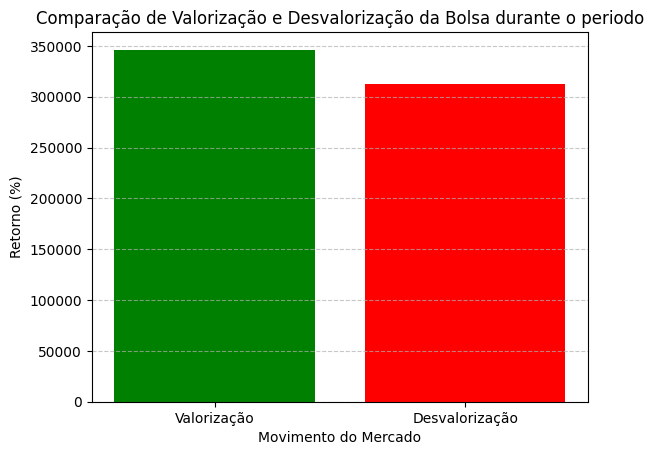

In [169]:
#plotando os dados
valores = [valorizacao, abs(desvalorizacao)]
rotulos = ["Valorização", "Desvalorização"]
plt.bar(rotulos, valores, color=["green", "red"])
plt.xlabel("Movimento do Mercado")
plt.ylabel("Retorno (%)")
plt.title("Comparação de Valorização e Desvalorização da Bolsa durante o periodo")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [170]:
#Calculando a valorização e a desvalorização por ano
valorizacao_por_ano = df[df["return (%)"] > 0].groupby("year")["return (%)"].sum()
desvalorizacao_por_ano = abs(df[df["return (%)"] < 0].groupby("year")["return (%)"].sum())

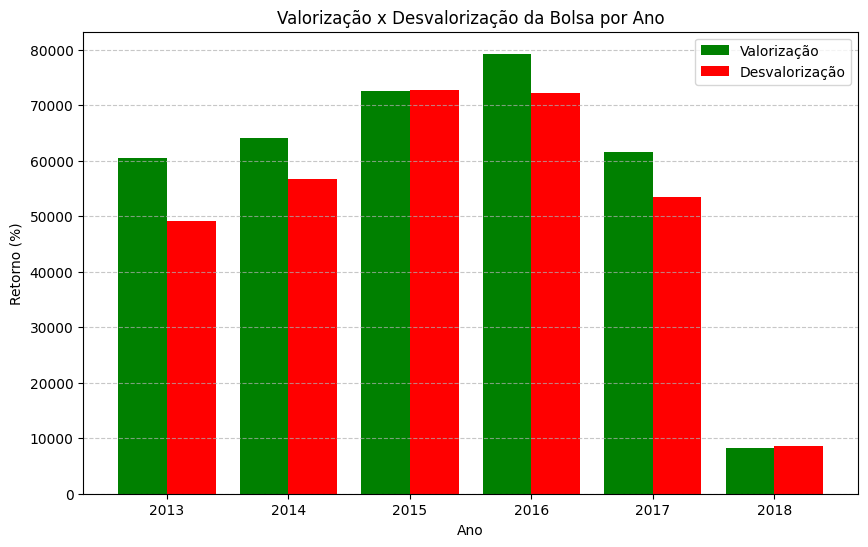

In [171]:

#Criando gráfico para comparar a valorização X desvalorização por ano
anos = valorizacao_por_ano.index

plt.figure(figsize=(10, 6))
plt.bar(anos - 0.4/2, valorizacao_por_ano, width=0.4, color='green', label='Valorização')
plt.bar(anos + 0.4/2, desvalorizacao_por_ano, width=0.4, color='red', label='Desvalorização')


plt.xlabel("Ano")
plt.ylabel("Retorno (%)")
plt.title("Valorização x Desvalorização da Bolsa por Ano")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


In [172]:
#Calculando a valorização liquida do periodo
saldo_valorizacao = valorizacao_por_ano.sum() - desvalorizacao_por_ano.sum()
print(f"Valorização líquida do período: {saldo_valorizacao:.2f}%")

Valorização líquida do período: 33479.28%


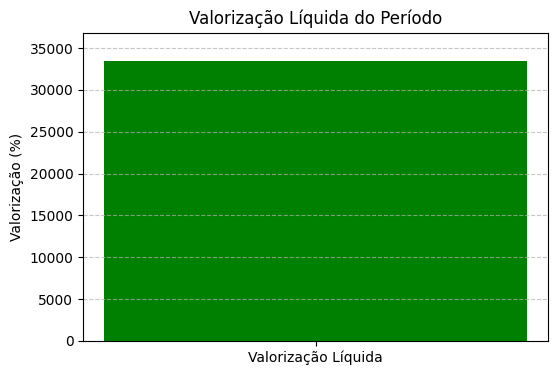

In [173]:
#Criando gráfico para visualizar a valorização liquida do periodo
saldo_valorizacao = valorizacao_por_ano.sum() - desvalorizacao_por_ano.sum()


plt.figure(figsize=(6, 4))
plt.bar(["Valorização Líquida"], [saldo_valorizacao], color="green")


plt.ylabel("Valorização (%)")
plt.title("Valorização Líquida do Período")
plt.ylim(0, saldo_valorizacao * 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)


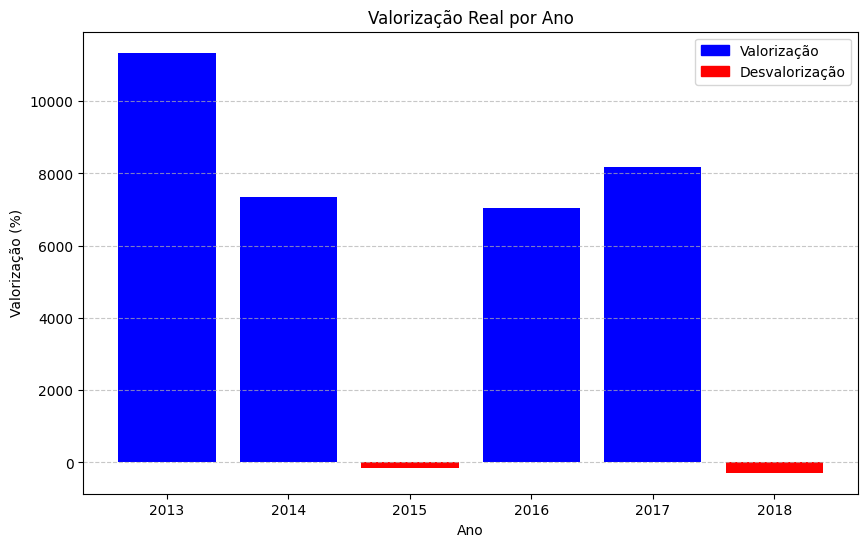

In [180]:
#Criando gráfico de barras para mostrar a valorização real de cada ano

cores = ["blue" if v >= 0 else "red" for v in valorizacao_real_por_ano]


plt.figure(figsize=(10, 6))
plt.bar(valorizacao_real_por_ano.index, valorizacao_real_por_ano, color=cores)


azul_patch = mpatches.Patch(color="blue", label="Valorização")
vermelho_patch = mpatches.Patch(color="red", label="Desvalorização")
plt.legend(handles=[azul_patch, vermelho_patch])


plt.xlabel("Ano")
plt.ylabel("Valorização (%)")
plt.title("Valorização Real por Ano")
plt.grid(axis="y", linestyle="--", alpha=0.7)



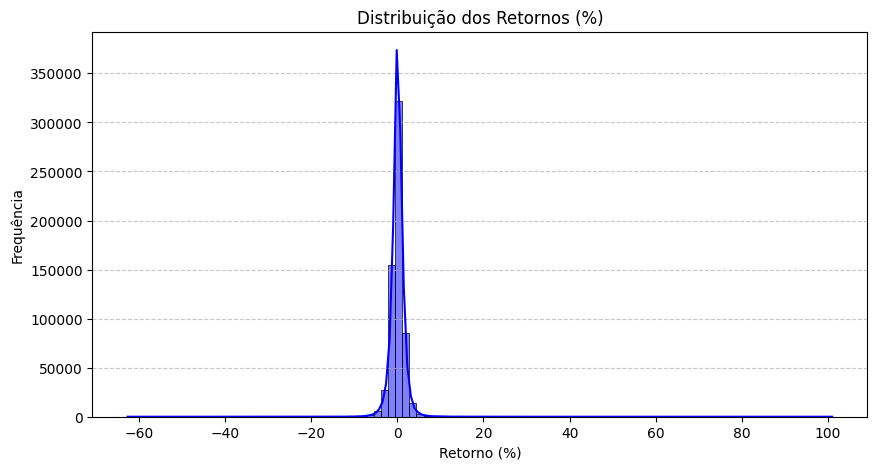

In [242]:
#Criando um gráfico histograma para análisar a distribuição dos retornos em porcentagem
plt.figure(figsize=(10, 5))

sns.histplot(df['return (%)'], bins=100, kde=True, color='blue')

plt.title('Distribuição dos Retornos (%)')
plt.xlabel('Retorno (%)')
plt.ylabel('Frequência')
plt.grid(axis="y", linestyle="--", alpha=0.7)



plt.show()

In [256]:
a, b = np.polyfit(df['volatility'], df['return (%)'], 1)
y = a*df['volatility']+b
y

,volatility
1,0.065788
2,0.065788
3,0.065788
4,0.065788
5,0.105844
...,...
619035,0.059198
619036,0.054487
619037,0.068706
619038,0.069116


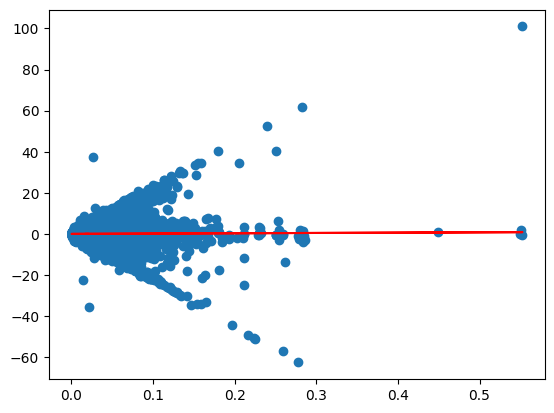

In [259]:
#Criando um gráfico de regressão linear para entender a relação entre retorno X volatilidade
plt.plot(df['volatility'], df['return (%)'], 'o', label='Dados')
plt.plot(df['volatility'], y, 'r', label='Regressão Linear')


In [263]:
#Verificando o ajuste da reta aos dados
np.linalg.norm(df['return (%)'] - y)

np.float64(1263.7036559787239)

##Tratando outliers